# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# pip install citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | caravelas
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | mount gambier
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | fevralsk
City not found. Skipping...
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | cidreira
Processing Record 10 of Set 1 | marfino
Processing Record 11 of Set 1 | pemba
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | puerto suarez
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | saldanha
Processing Record 17 of Set 1 | manggar
Processing Record 18 of Set 1 | kaitangata
Processing Record 19 of Set 1 | clyde river
Processing Record 20 of Set 1 | santo antonio do sudoeste
Processing Record 21 of Set 1 | belushya guba
Ci

Processing Record 36 of Set 4 | katsuura
Processing Record 37 of Set 4 | ponta do sol
Processing Record 38 of Set 4 | geraldton
Processing Record 39 of Set 4 | burnie
Processing Record 40 of Set 4 | la palma
Processing Record 41 of Set 4 | zabol
Processing Record 42 of Set 4 | igrim
Processing Record 43 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 44 of Set 4 | burica
City not found. Skipping...
Processing Record 45 of Set 4 | kitimat
Processing Record 46 of Set 4 | toliary
City not found. Skipping...
Processing Record 47 of Set 4 | macenta
Processing Record 48 of Set 4 | zhangjiakou
Processing Record 49 of Set 4 | dongsheng
Processing Record 0 of Set 5 | te anau
Processing Record 1 of Set 5 | puerto leguizamo
Processing Record 2 of Set 5 | conceicao do rio verde
Processing Record 3 of Set 5 | biscarrosse
Processing Record 4 of Set 5 | east london
Processing Record 5 of Set 5 | yumen
Processing Record 6 of Set 5 | asau
Processing Record 7 of Set 5 | gazojak
Pro

Processing Record 28 of Set 8 | malatya
Processing Record 29 of Set 8 | santa cruz
Processing Record 30 of Set 8 | saint-francois
Processing Record 31 of Set 8 | olafsvik
Processing Record 32 of Set 8 | porirua
Processing Record 33 of Set 8 | nishihara
Processing Record 34 of Set 8 | maragogi
Processing Record 35 of Set 8 | laguna
Processing Record 36 of Set 8 | comodoro rivadavia
Processing Record 37 of Set 8 | priiskovyy
Processing Record 38 of Set 8 | sobolevo
Processing Record 39 of Set 8 | souillac
Processing Record 40 of Set 8 | dianopolis
City not found. Skipping...
Processing Record 41 of Set 8 | poum
Processing Record 42 of Set 8 | charters towers
Processing Record 43 of Set 8 | corinto
Processing Record 44 of Set 8 | mazyr
Processing Record 45 of Set 8 | nabire
Processing Record 46 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 47 of Set 8 | port moresby
Processing Record 48 of Set 8 | wahran
City not found. Skipping...
Processing Record 49 of Set 8 | sam

Processing Record 15 of Set 12 | opuwo
Processing Record 16 of Set 12 | hanzhong
Processing Record 17 of Set 12 | marevo
Processing Record 18 of Set 12 | rong kwang
Processing Record 19 of Set 12 | nouadhibou
Processing Record 20 of Set 12 | leshukonskoye
Processing Record 21 of Set 12 | fare
Processing Record 22 of Set 12 | san cristobal
Processing Record 23 of Set 12 | bua yai
Processing Record 24 of Set 12 | poso
Processing Record 25 of Set 12 | kimbe
Processing Record 26 of Set 12 | kuche
City not found. Skipping...
Processing Record 27 of Set 12 | bihoro
Processing Record 28 of Set 12 | aquiraz
Processing Record 29 of Set 12 | plettenberg bay
Processing Record 30 of Set 12 | sibolga
Processing Record 31 of Set 12 | rawson
Processing Record 32 of Set 12 | coahuayana
Processing Record 33 of Set 12 | saint anthony
Processing Record 34 of Set 12 | panaba
Processing Record 35 of Set 12 | xambioa
Processing Record 36 of Set 12 | bac lieu
Processing Record 37 of Set 12 | kamenka
Processi

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,caravelas,-17.7125,-39.2481,24.57,90,100,2.28,BR,1673213379
1,punta arenas,-53.1500,-70.9167,18.06,48,75,6.17,CL,1673213162
2,mount gambier,-37.8333,140.7667,16.40,83,10,4.22,AU,1673213379
3,upernavik,72.7868,-56.1549,-27.52,93,66,4.42,GL,1673213379
4,vaini,-21.2000,-175.2000,30.09,74,75,2.57,TO,1673213379


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,caravelas,-17.7125,-39.2481,24.57,90,100,2.28,BR,1673213379
1,punta arenas,-53.1500,-70.9167,18.06,48,75,6.17,CL,1673213162
2,mount gambier,-37.8333,140.7667,16.40,83,10,4.22,AU,1673213379
3,upernavik,72.7868,-56.1549,-27.52,93,66,4.42,GL,1673213379
4,vaini,-21.2000,-175.2000,30.09,74,75,2.57,TO,1673213379


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

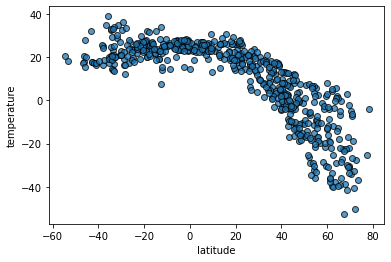

In [19]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("latitude")
plt.ylabel("temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

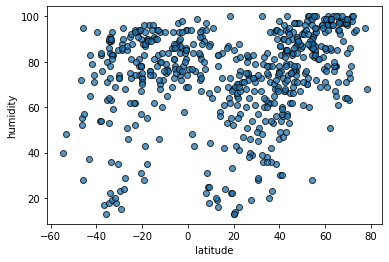

In [20]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("latitude")
plt.ylabel("humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

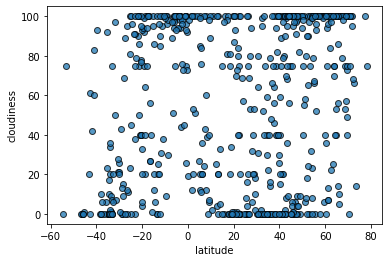

In [21]:
# Build the scatter plots for latitude vs. cloudiness

x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("latitude")
plt.ylabel("cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

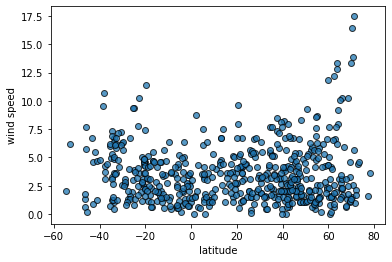

In [22]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("latitude")
plt.ylabel("wind speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE